In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris

iris = load_iris()
print(str(iris.data.shape))
print(str(iris.feature_names))

(150, 4)
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


The Iris dataset has 150 instances and four features:
+ Sepal length
+ Sepal width
+ Petal length
+ Petal width

In [14]:
# Let's build a decision tree classifier using petal features
X = iris.data[:,2:]
print(X.shape)
y = iris.target

(150, 2)


In [25]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

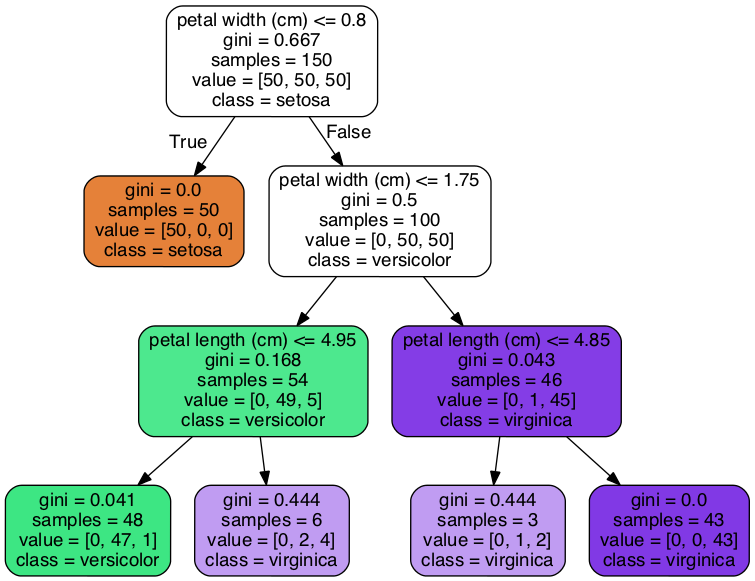

In [26]:
# Generate the visualization of the tree using graphviz
import pygraphviz as pgv
from sklearn.tree import export_graphviz
from IPython.display import Image

tree_dot = export_graphviz(clf, out_file=None, feature_names=iris.feature_names[2:],
               class_names=iris.target_names, rounded=True, filled=True)
Image(pgv.AGraph(tree_dot).draw(format='png', prog='dot'))

Decisions Trees work by asking questions of provided samples. The sample "falls through" the tree like a [pachinko ball](https://en.wikipedia.org/wiki/Pachinko#Recreational_pachinko), where it receives a classification in the leaf nodes of the tree.
The parent nodes apply a thresholdling predicate to determine where a particular sample is sorted.
Of particular note, DTs do not require data preparation, e.g. scaling.
In the above classifier, you can adjust the `mx_depth` to break out the data more.

In [28]:
# Let's make up a new feature pair and see the probability of its class
clf.predict_proba([[4.6,1.5]])

array([[0.        , 0.97916667, 0.02083333]])

In [29]:
# Or as a class:
clf.predict([[4.6,1.5]])

array([1])

The **classification and regression tree** (CART) algorithm splits data into two subsets (a *binary* tree classifier) using a feature $k$ and threshold for that feature, $t_k$.
The goal of the algorithm is find a pair $(k,t_k)$ that **minimizes the impurity of subsets**.

One measure of impurity is *Gini impurity*:

$$
G_i = 1 - \sum_{k=1}^n p_{i,k}^2
$$

where $p_{i,k}$ is the ratio of class *k* instances among training instances held within node $i$.
In the trained tree diagram, this calculation uses the numbers in the `value` array.

CART continues to split the training data until $max_depth$ or when it is not possible to split and reduce impurity.